From the Online Excel Sheet

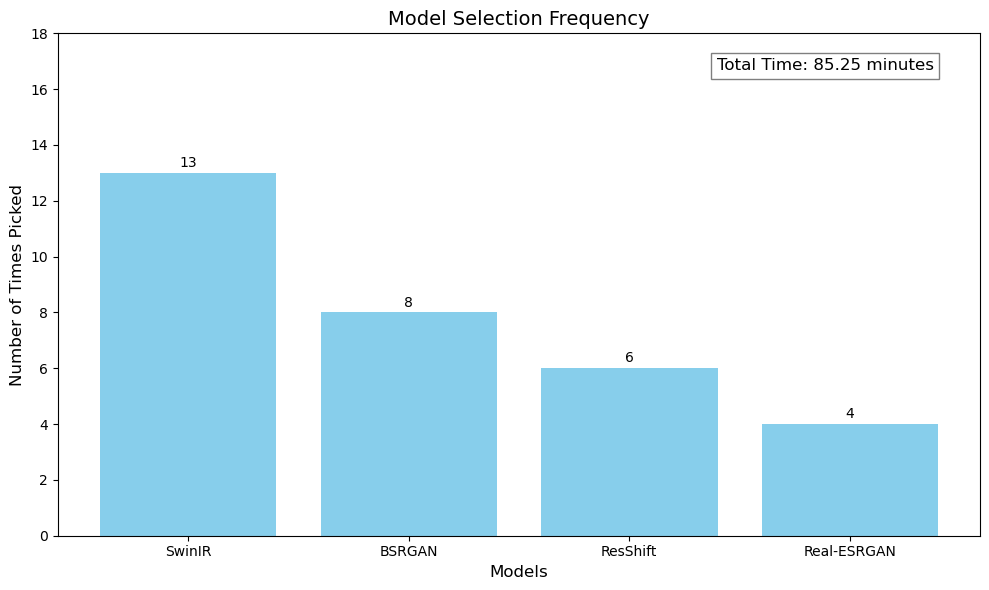

In [2]:
import matplotlib.pyplot as plt
from collections import Counter

# Data as a multi-line string
data = """
0821.png	SwinIR	33.029114
0819.png	SwinIR	8.882516
0861.png	Real-ESRGAN	16.52227
0874.png	BSRGAN	17.579614
0838.png	ResShift	14.512504
0871.png	SwinIR	12.462594
0887.png	ResShift	65.31772
0884.png	ResShift	16.502082
0831.png	BSRGAN	12.928706
0814.png	BSRGAN	14.572688
0873.png	Real-ESRGAN	10.650801
0837.png	SwinIR	12.133135
0802.png	BSRGAN	14.057148
0849.png	SwinIR	46.828195
0896.png	SwinIR	10.216562
0896.png	SwinIR	32.505664
0829.png	BSRGAN	3.470178
0859.png	SwinIR	7.730794
0824.png	SwinIR	4633.580274
0858.png	SwinIR	11.410484
0801.png	SwinIR	14.278369
0868.png	ResShift	13.870715
0845.png	BSRGAN	11.359879
0834.png	Real-ESRGAN	8.671354
0841.png	ResShift	8.913122
0825.png	ResShift	11.049429
0809.png	Real-ESRGAN	8.018639
0899.png	SwinIR	8.847662
0816.png	BSRGAN	10.417369
0862.png	BSRGAN	14.819846
0806.png	SwinIR	9.713429
"""

# Parse the data
lines = data.strip().split('\n')
models = []
total_time_seconds = 0

for line in lines:
    parts = line.split('\t')
    if len(parts) == 3:
        filename, model, time_str = parts
        models.append(model)
        try:
            time = float(time_str)
            total_time_seconds += time
        except ValueError:
            print(f"Invalid time value: {time_str} in line: {line}")

# Count the occurrences of each model
model_counts = Counter(models)

# Sort the models by count in descending order
sorted_models = sorted(model_counts.items(), key=lambda x: x[1], reverse=True)
models_sorted, counts_sorted = zip(*sorted_models)

# Create the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(models_sorted, counts_sorted, color='skyblue')

# Add counts above the bars
for bar, count in zip(bars, counts_sorted):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(count), 
             ha='center', va='bottom', fontsize=10)

# Add total time annotation
plt.xlabel('Models', fontsize=12)
plt.ylabel('Number of Times Picked', fontsize=12)
plt.title('Model Selection Frequency', fontsize=14)
plt.ylim(0, max(counts_sorted) + 5)

# Display total time in seconds at the end of the graph
plt.text(0.95, 0.95, f'Total Time: {total_time_seconds/60:.2f} minutes',
         horizontalalignment='right',
         verticalalignment='top',
         transform=plt.gca().transAxes,
         fontsize=12,
         bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()
